# Data Generation

## Imports & Variables

In [1]:
import random
import os
from PIL import Image
import json
from tqdm import tqdm
import time
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

import utils_gen
pd.set_option('display.max_colwidth', None)

In [2]:
seed = 2022
random.seed(seed)

In [3]:
debug = False
save_gen = True

In [4]:
path_scenegraph = "../data/scenegraphs"
path_L2L3 = "../data/L2L3_captions.json"

## Scenegraph Parsing & L1 Generation

In [5]:
data_L1 = []
n_success = 0
n_error = 0

files_sg = list(filter(lambda k: 'json' in k, os.listdir(path_scenegraph)))
files_sg.sort()

assert(len(files_sg) == 8822) ## unit test check length

for file in tqdm(files_sg):
    filepath = os.path.join(path_scenegraph, file)
    with open(filepath) as f:
        read_sg = json.load(f)
        try:
            parsed_sg = utils_gen.parse_all_sg(read_sg)
            parsed_dt = utils_gen.parse_all_dt(read_sg)
            parsed_metadata = utils_gen.parse_all_sg(read_sg,src=False)
            parsed_caption, parsed_metadatadict = utils_gen.generate_caption(*parsed_metadata)
            data_L1.append((file.replace(".json",""), parsed_sg, parsed_dt, parsed_caption, parsed_metadata))
            if debug:
                print(f"Parsed Scenegraph: {parsed_sg}\n")
                print(f"Parsed Datatable: {parsed_dt}\n")
                print(f"Parsed L1 Metadata: {parsed_metadata}")
                display(Image.open(os.path.join("../data/images", file.replace(".json",".png"))))
                print(f"Parsed Caption: {parsed_caption}")
            n_success += 1
        except Exception as e:
            n_error += 1
            print(e)
print(f"Successes: {n_success}")
print(f"Errors: {n_error}")

100%|██████████████████████████████████████████████████████████████████████████████| 8822/8822 [00:58<00:00, 150.27it/s]

Successes: 8822
Errors: 0


In [6]:
if save_gen:
    with open("../data/L1gen.pkl", 'wb') as f:
        pickle.dump(data_L1, f)

## Data Preprocessing

In [8]:
df_L1 = pd.DataFrame(data_L1, columns=["img_id", "scenegraph", "datatable", "caption_L1", "L1_properties"])
df_L1["img_id"] = pd.to_numeric(df_L1["img_id"])

In [9]:
## unit test
for r in df_L1.sample(n=5).itertuples():
    assert(all(r[5][0] in s for s in [r[2], r[4]])==True) ## check chart type
    assert(all(r[5][1] in s for s in [r[2], r[3], r[4]])==True) ## check chart title
    assert(all(r[5][2] in s for s in [r[2], r[3], r[4]])==True) ## check x-axis
    assert(all(r[5][3] in s for s in [r[2], r[3], r[4]])==True) ## check y-axis

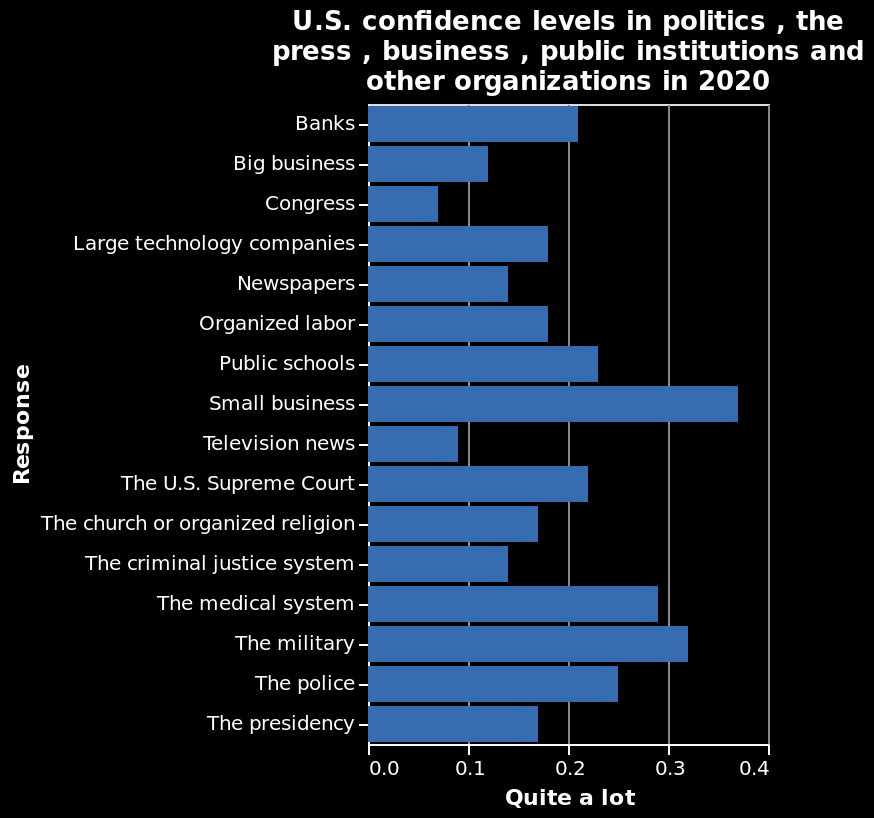

title U.S. confidence levels in politics , the press , business , public institutions and other organizations in 2020 x 100 y -47 x-axis x 100 y 21 Quite a lot y-axis x -168 y 160 Response xtick x 0 val 0.0 x 50 val 0.1 x 100 val 0.2 x 150 val 0.3 x 200 val 0.4 ytick y 10 val Banks y 30 val Big business y 50 val Congress y 70 val Large technology companies y 90 val Newspapers y 110 val Organized labor y 130 val Public schools y 150 val Small business y 170 val Television news y 190 val The U.S. Supreme Court y 210 val The church or organized religion y 230 val The criminal justice system y 250 val The medical system y 270 val The military y 290 val The police y 310 val The presidency marks bar XY 0 261 width 160 H 18 desc XY 0 141 width 185 H 18 desc XY 0 201 width 85 H 18 desc XY 0 281 width 125 H 18 desc XY 0 301 width 85 H 18 desc XY 0 241 width 145.0 H 18 desc XY 0 181 width 110.0 H 18 desc XY 0 121 width 115.0 H 18 desc XY 0 1 width 105.0 H 18 desc XY 0 61 width 90.0 H 18 desc XY 

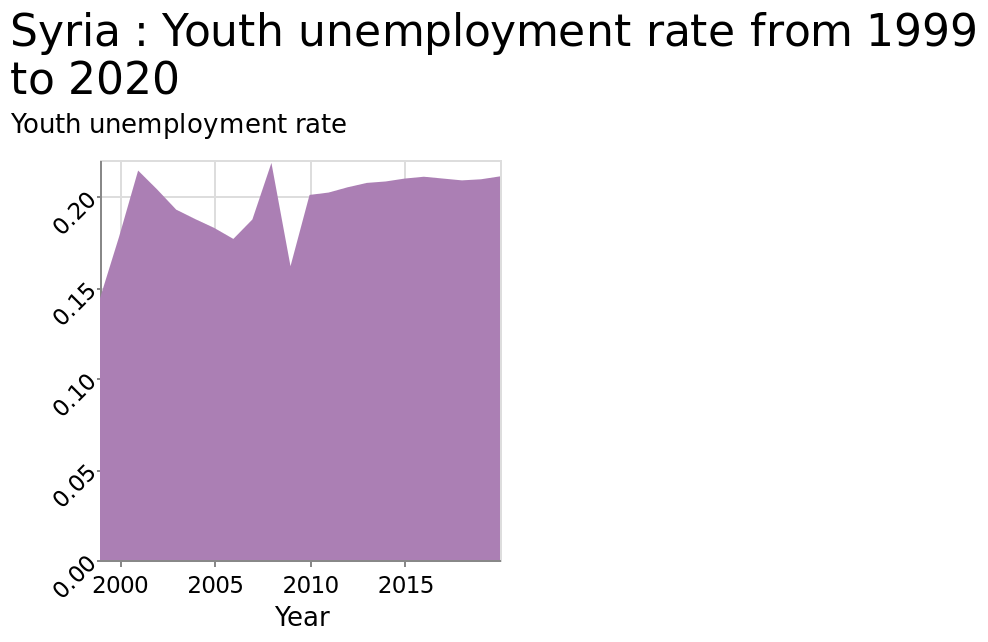

title Syria : Youth unemployment rate from 1999 to 2020 x -45 y -74 x-axis x 100 y 22.5 Year y-axis x -45 y -11 Youth unemployment rate xtick x 10 val 2000 x 57 val 2005 x 105 val 2010 x 152 val 2015 ytick y 200 val 0.00 y 155 val 0.05 y 109 val 0.10 y 64 val 0.15 y 18 val 0.20 marks area XY 0 69.091 H 130.909 desc XY 9.518 38.455 H 161.545 desc XY 19.061 5.273 H 194.727 desc XY 28.579 14.727 H 185.273 desc XY 38.096 24.818 H 175.182 desc XY 47.614 29.545 H 170.455 desc XY 57.158 34.0 H 166 desc XY 66.675 39.455 H 160.545 desc XY 76.193 29.727 H 170.273 desc XY 85.711 1.455 H 198.545 desc XY 95.254 53.091 H 146.909 desc XY 104.772 17.455 H 182.545 desc XY 114.289 16.273 H 183.727 desc XY 123.807 13.636 H 186.364 desc XY 133.351 11.455 H 188.545 desc XY 142.868 10.727 H 189.273 desc XY 152.386 9.273 H 190.727 desc XY 161.904 8.364 H 191.636 desc XY 171.447 9.273 H 190.727 desc XY 180.965 10.182 H 189.818 desc XY 190.482 9.636 H 190.364 desc XY 200 8.182 H 191.818 desc


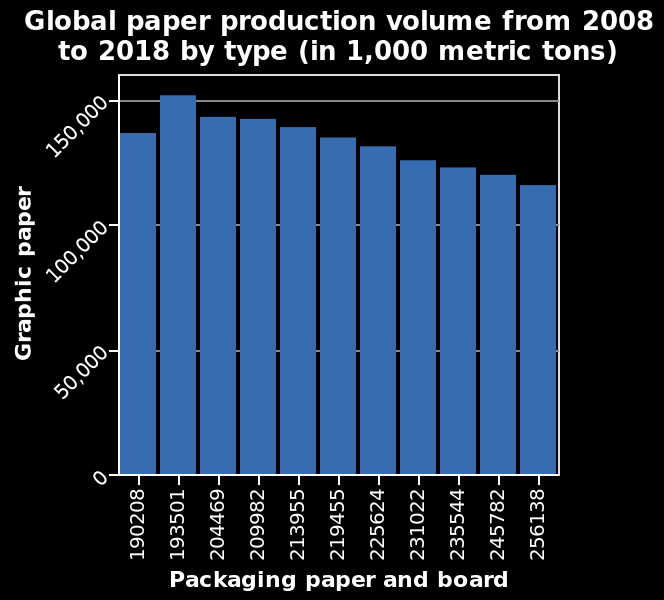

title Global paper production volume from 2008 to 2018 by type (in 1,000 metric tons) x 110 y -32 x-axis x 110 y 47 Packaging paper and board y-axis x -42.113 y 100 Graphic paper xtick x 10 val 190208 x 30 val 193501 x 50 val 204469 x 70 val 209982 x 90 val 213955 x 110 val 219455 x 130 val 225624 x 150 val 231022 x 170 val 235544 x 190 val 245782 x 210 val 256138 ytick y 200 val 0 y 138 val 50,000 y 75 val 100,000 y 13 val 150,000 marks bar XY 21 10.639 width 18 H 189.361 desc XY 1 29.519 width 18 H 170.481 desc XY 41 21.418 width 18 H 178.583 desc XY 61 22.441 width 18 H 177.559 desc XY 81 26.555 width 18 H 173.445 desc XY 101 31.75 width 18 H 168.25 desc XY 121 36.153 width 18 H 163.847 desc XY 141 43.124 width 18 H 156.876 desc XY 161 46.72 width 18 H 153.28 desc XY 181 50.402 width 18 H 149.597 desc XY 201 55.536 width 18 H 144.464 desc


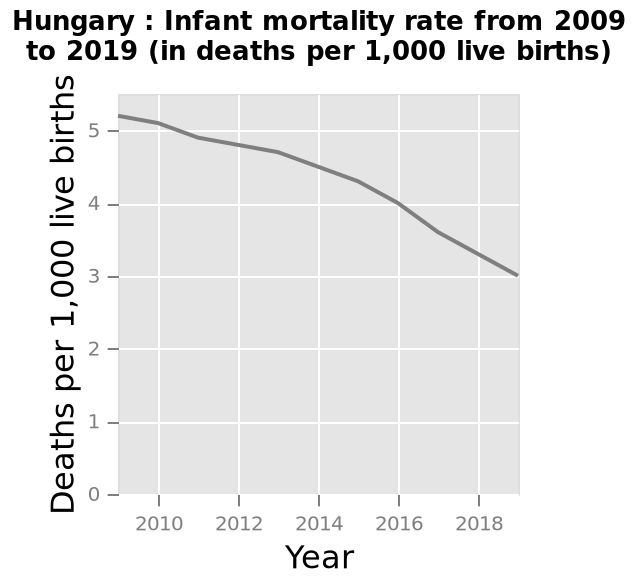

title Hungary : Infant mortality rate from 2009 to 2019 (in deaths per 1,000 live births) x 100 y -42 x-axis x 100 y 23.67 Year y-axis x -19.67 y 100 Deaths per 1,000 live births xtick x 20 val 2010 x 60 val 2012 x 100 val 2014 x 140 val 2016 x 180 val 2018 ytick y 200 val 0 y 164 val 1 y 127 val 2 y 91 val 3 y 55 val 4 y 18 val 5 marks line XY 0 10.909 desc XY 19.989 14.545 desc XY 39.978 21.818 desc XY 59.967 25.455 desc XY 80.011 29.091 desc XY 100 36.364 desc XY 119.989 43.636 desc XY 139.978 54.545 desc XY 160.022 69.091 desc XY 180.011 80 desc XY 200 90.909 desc


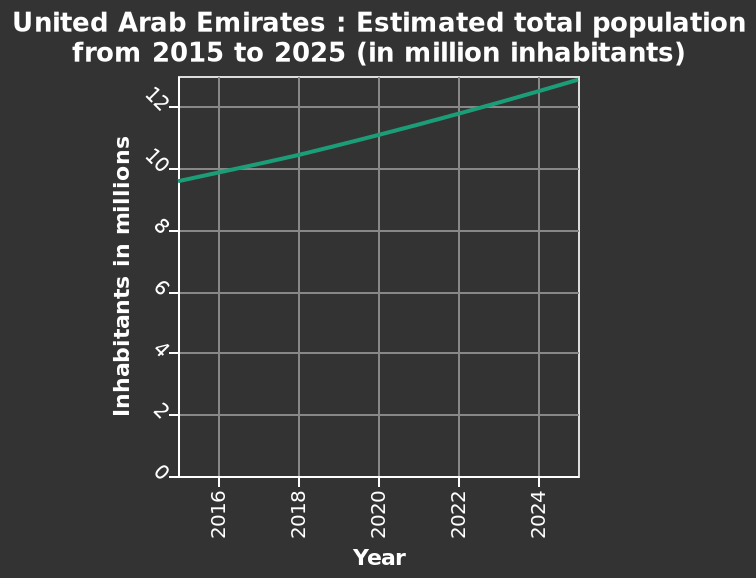

title United Arab Emirates : Estimated total population from 2015 to 2025 (in million inhabitants) x 100 y -32.154 x-axis x 100 y 35 Year y-axis x -23.021 y 100 Inhabitants in millions xtick x 20 val 2016 x 60 val 2018 x 100 val 2020 x 140 val 2022 x 180 val 2024 ytick y 200 val 0 y 169 val 2 y 138 val 4 y 108 val 6 y 77 val 8 y 46 val 10 y 15 val 12 marks line XY 0 52.615 desc XY 19.984 48.308 desc XY 40.022 44.0 desc XY 60.005 39.538 desc XY 79.989 34.615 desc XY 99.973 29.538 desc XY 120.011 24.308 desc XY 139.995 18.923 desc XY 159.978 13.385 desc XY 179.962 7.692 desc XY 200 1.846 desc


In [10]:
## unit test manual check of chart vs. scenegraph
for r in df_L1.sample(n=5).itertuples():
    display(Image.open(os.path.join("../data/images", str(r[1])+".png")))
    print(r[2])

In [11]:
with open(path_L2L3, 'rb') as f:
    df_L2L3 = pd.read_json(f)
df_L2L3["caption_L2L3"] = df_L2L3["caption_L2L3"].map(utils_helper.cleanL2L3)

assert(len(df_L2L3) == 12441) ## unit test check L2L3 length

In [12]:
df_joint = df_L1.set_index("img_id").join(df_L2L3.set_index("img_id"), on="img_id", how="right")
df_joint = df_joint.sort_values(by="img_id", ascending=True)
df_joint = df_joint.reset_index()
# df_joint.head()

assert(len(df_joint["caption_L2L3"].unique()) == 12441) ## unit test check L2L3 length post-merge
assert(len(df_joint["caption_L1"].unique()) == 8822) ## unit test check L1 length post-merge
assert(len(df_joint["img_id"].unique()) == 8822) ## unit test check unique image IDs length post-merge

In [13]:
## unit test manual check of L1 vs L2L3 results
df_joint.loc[:, ["caption_L1", "caption_L2L3"]].sample(n=5)

,caption_L1,caption_L2L3
10336,"Gender distribution of religious groups in the United States in 2017 , by faith tradition is a bar graph. The y-axis shows Men. Along the x-axis, faith tradition is shown as a categorical scale with Black Protestant on one end and White mainline Protestant at the other.","from studying this bar chart, I can see that Hinduism and Islam has the highest percentage of men with unaffiliated being third in place. it seems Jehovahs whiteness is lowest in percentage of men."
2629,Golden State Warriors all-time games played leaders from 1946 to 2020 is a bar chart. The y-axis measures Golden State Warriors Player on categorical scale from Adonal Foyle to Stephen Curry while the x-axis measures Games played with linear scale of range 0 to 800.,Chris Mullen has played the most games between 1946 to 2020 among the Golden State Warriors. Klay Thompson and Larry Smith played the list games between 1946 to 2020 among the Gold State Warriors.
5125,Here a area plot is named House price index for existing houses in Spain from 2008 to 2019. The x-axis measures Year while the y-axis measures Housing price index.,"From 2008 to about early 2014, house prices were decreasing at a rapid rate. Since that date, prices have been increasing at a rapid rate."
10880,"Here a is a line diagram called Average age at marriage in the Netherlands from 2009 to 2019 , by gender. Along the x-axis, Year is plotted along a linear scale of range 2008 to 2018. A linear scale from 0 to 40 can be seen on the y-axis, labeled Women.","I can see that there is a steady climb in people waiting to get married. It is a slow climb, but definitely happening."
8144,"Central government expenditure in Sweden from 2009 to 2019 (in billion SEK) is a line diagram. The y-axis measures Expenditure in billion SEK as linear scale of range 0 to 1,000 while the x-axis plots Year along linear scale of range 2010 to 2018.","The lowest expenditure in billion in Sweden was in 2010, with just below 800 billion. The highest was in 2018 with 1000 billion. The graph shows an average increase in expenditure with a decrease in 2013-2014."


In [14]:
df_joint["img_id"] = df_joint["img_id"].map(str)
captionnumber = df_joint["img_id"] + "_" + df_joint.groupby("img_id").cumcount().add(1).astype(str).str.zfill(2)
df_joint["caption_id"] = captionnumber

assert(len(df_joint["caption_id"].unique()) == 12441) ## unit test check caption_id uniqueness

In [15]:
df_joint

,img_id,scenegraph,datatable,caption_L1,L1_properties,caption_L2L3,caption_id
0,1,title National Football League average ticket price from 2006 to 2019 (in U.S. dollars) x 100 y -32 x-axis x 100 y 40.042 Year y-axis x -24 y 100 Ticket price in U.S. dollars xtick x 0 val 2006 x 31 val 2008 x 62 val 2010 x 92 val 2012 x 123 val 2014 x 154 val 2016 x 185 val 2018 ytick y 200 val 0 y 164 val 20 y 127 val 40 y 91 val 60 y 55 val 80 y 18 val 100 marks line XY 0 86.582 desc XY 15.375 77.982 desc XY 30.75 68.727 desc XY 46.167 63.655 desc XY 61.542 60.964 desc XY 76.917 59.382 desc XY 92.291 57.491 desc XY 107.709 51.745 desc XY 123.083 46.491 desc XY 138.458 43.945 desc XY 153.833 30.945 desc XY 184.625 17.709 desc XY 200 13.909 desc,"National Football League average ticket price from 2006 to 2019 (in U.S. dollars) <s> Year Ticket price in U.S. dollars Dec 31, 2005 62.38 Dec 31, 2006 67.11 Dec 31, 2007 72.2 Dec 31, 2008 74.99 Dec 31, 2009 76.47 Dec 31, 2010 77.34 Dec 31, 2011 78.38 Dec 31, 2012 81.54 Dec 31, 2013 84.43 Dec 31, 2014 85.83 Dec 31, 2015 92.98 Dec 31, 2017 100.26 Dec 31, 2018 102.35","National Football League average ticket price from 2006 to 2019 (in U.S. dollars) is a line chart. There is a linear scale from 2006 to 2018 along the x-axis, marked Year. Along the y-axis, Ticket price in U.S. dollars is measured along a linear scale from 0 to 100.","[line, National Football League average ticket price from 2006 to 2019 (in U.S. dollars), Year, Ticket price in U.S. dollars, linear scale from 2006 to 2018, linear scale from 0 to 100]","The ticket price shown for 2006 is just over 60 dollars, and it rises from that point to just over 100 dollars in 2018. The line upward is quite steep, almost always rising sharply each year.",1_01
1,2,"title Average viewers of Minecraft on Twitch worldwide from January 2018 to November 2020 (in 1,000s) x 100 y -33 x-axis x 100 y 35.042 Month y-axis x -28.66 y 100 Number of viewers in thousands xtick x 0 val 2018 x 71 val 2019 x 141 val 2020 ytick y 200 val 0 y 164 val 20 y 127 val 40 y 91 val 60 y 55 val 80 y 18 val 100 marks area XY 0 190.236 H 9.764 desc XY 5.99 190.982 H 9.018 desc XY 11.401 191.145 H 8.855 desc XY 17.391 189.909 H 10.091 desc XY 23.188 192.491 H 7.509 desc XY 29.179 192.236 H 7.764 desc XY 34.976 187.164 H 12.836 desc XY 40.966 186.964 H 13.036 desc XY 46.957 189.818 H 10.182 desc XY 52.754 189.255 H 10.745 desc XY 58.744 189.164 H 10.836 desc XY 64.541 184.4 H 15.6 desc XY 70.531 173.582 H 26.418 desc XY 76.522 183.036 H 16.964 desc XY 81.932 186.709 H 13.291 desc XY 87.923 184.455 H 15.545 desc XY 93.72 178.218 H 21.782 desc XY 99.71 156.873 H 43.127 desc XY 105.507 154.273 H 45.727 desc XY 111.498 119.982 H 80.018 desc XY 117.488 140.382 H 59.618 desc XY 123.285 163.055 H 36.945 desc XY 129.275 160.145 H 39.855 desc XY 135.072 158.527 H 41.473 desc XY 141.063 154.218 H 45.782 desc XY 147.053 155.091 H 44.909 desc XY 152.657 143.964 H 56.036 desc XY 158.647 96 H 104 desc XY 164.444 99.491 H 100.509 desc XY 170.435 101.8 H 98.2 desc XY 176.232 70.782 H 129.218 desc XY 182.222 101.527 H 98.473 desc XY 188.213 101.582 H 98.418 desc XY 194.01 78.2 H 121.8 desc XY 200 6.745 H 193.255 desc","Average viewers of Minecraft on Twitch worldwide from January 2018 to November 2020 (in 1,000s) <s> Month Number of viewers in thousands Dec 31, 2017 5.37 Jan 31, 2018 4.96 Feb 28, 2018 4.87 Mar 31, 2018 5.55 Apr 30, 2018 4.13 May 31, 2018 4.27 Jun 30, 2018 7.06 Jul 31, 2018 7.17 Aug 31, 2018 5.6 Sep 30, 2018 5.91 Oct 31, 2018 5.96 Nov 30, 2018 8.58 Dec 31, 2018 14.53 Jan 31, 2019 9.33 Feb 28, 2019 7.31 Mar 31, 2019 8.55 Apr 30, 2019 11.98 May 31, 2019 23.72 Jun 30, 2019 25.15 Jul 31, 2019 44.01 Aug 31, 2019 32.79 Sep 30, 2019 20.32 Oct 31, 2019 21.92 Nov 30, 2019 22.81 Dec 31, 2019 25.18 Jan 31, 2020 24.7 Feb 29, 2020 30.82 Mar 31, 2020 57.2 Apr 30, 2020 55.28 May 31, 2020 54.01 Jun 30, 2020 71.07 Jul 31, 2020 54.16 Aug 31, 2020 54.13 Sep 30, 2020 66.99 Oct 31, 2020 106.29","This is a a

## Train/Test/Val Split

In [16]:
L2L3_split = {'train': [],
              'test': [],
              'val': []}

In [17]:
ids_L2L3 = list(df_joint["img_id"].unique())

assert(len(ids_L2L3) == 8822) ## unit test check caption_id uniqueness

L2L3_split['train'], L2L3_rest = train_test_split(ids_L2L3, train_size=0.8, shuffle=True, random_state=seed)
L2L3_split['test'], L2L3_split['val'] = train_test_split(L2L3_rest, test_size=0.5, shuffle=True, random_state=seed)

assert(len(L2L3_split["train"]) == 7057) ## unit test check train size
assert(len(L2L3_split["test"]) == 882) ## unit test check test size
assert(len(L2L3_split["val"]) == 883) ## unit test check val size
assert((len(L2L3_split["train"])+len(L2L3_split["test"])+len(L2L3_split["val"]) == 8822)) ## unit test check recombining

In [22]:
with open('../data/splits.json', 'w') as f:
    json.dump(L2L3_split, f)

In [19]:
df_joint["split"] = df_joint["img_id"].map(lambda x: "train" if x in L2L3_split['train'] else ("test" if x in L2L3_split['test'] else "validation"))
df_joint = df_joint[["caption_id", "img_id", "split", "scenegraph", "datatable", "caption_L1", "caption_L2L3", "L1_properties"]]

## unit test check total size
assert((len(df_joint[df_joint["split"] == "train"])+
        len(df_joint[df_joint["split"] == "test"])+
        len(df_joint[df_joint["split"] == "validation"]))==12441)

assert(len(df_joint[df_joint["split"] == "train"]["img_id"].unique())==7057) ## unit test check split train size
assert(len(df_joint[df_joint["split"] == "test"]["img_id"].unique())==882) ## unit test check split test size
assert(len(df_joint[df_joint["split"] == "validation"]["img_id"].unique())==883) ## unit test check split val size

df_joint.head()

,caption_id,img_id,split,scenegraph,datatable,caption_L1,caption_L2L3,L1_properties
0,1_01,1,train,title National Football League average ticket price from 2006 to 2019 (in U.S. dollars) x 100 y -32 x-axis x 100 y 40.042 Year y-axis x -24 y 100 Ticket price in U.S. dollars xtick x 0 val 2006 x 31 val 2008 x 62 val 2010 x 92 val 2012 x 123 val 2014 x 154 val 2016 x 185 val 2018 ytick y 200 val 0 y 164 val 20 y 127 val 40 y 91 val 60 y 55 val 80 y 18 val 100 marks line XY 0 86.582 desc XY 15.375 77.982 desc XY 30.75 68.727 desc XY 46.167 63.655 desc XY 61.542 60.964 desc XY 76.917 59.382 desc XY 92.291 57.491 desc XY 107.709 51.745 desc XY 123.083 46.491 desc XY 138.458 43.945 desc XY 153.833 30.945 desc XY 184.625 17.709 desc XY 200 13.909 desc,"National Football League average ticket price from 2006 to 2019 (in U.S. dollars) <s> Year Ticket price in U.S. dollars Dec 31, 2005 62.38 Dec 31, 2006 67.11 Dec 31, 2007 72.2 Dec 31, 2008 74.99 Dec 31, 2009 76.47 Dec 31, 2010 77.34 Dec 31, 2011 78.38 Dec 31, 2012 81.54 Dec 31, 2013 84.43 Dec 31, 2014 85.83 Dec 31, 2015 92.98 Dec 31, 2017 100.26 Dec 31, 2018 102.35","National Football League average ticket price from 2006 to 2019 (in U.S. dollars) is a line chart. There is a linear scale from 2006 to 2018 along the x-axis, marked Year. Along the y-axis, Ticket price in U.S. dollars is measured along a linear scale from 0 to 100.","The ticket price shown for 2006 is just over 60 dollars, and it rises from that point to just over 100 dollars in 2018. The line upward is quite steep, almost always rising sharply each year.","[line, National Football League average ticket price from 2006 to 2019 (in U.S. dollars), Year, Ticket price in U.S. dollars, linear scale from 2006 to 2018, linear scale from 0 to 100]"
1,2_01,2,train,"title Average viewers of Minecraft on Twitch worldwide from January 2018 to November 2020 (in 1,000s) x 100 y -33 x-axis x 100 y 35.042 Month y-axis x -28.66 y 100 Number of viewers in thousands xtick x 0 val 2018 x 71 val 2019 x 141 val 2020 ytick y 200 val 0 y 164 val 20 y 127 val 40 y 91 val 60 y 55 val 80 y 18 val 100 marks area XY 0 190.236 H 9.764 desc XY 5.99 190.982 H 9.018 desc XY 11.401 191.145 H 8.855 desc XY 17.391 189.909 H 10.091 desc XY 23.188 192.491 H 7.509 desc XY 29.179 192.236 H 7.764 desc XY 34.976 187.164 H 12.836 desc XY 40.966 186.964 H 13.036 desc XY 46.957 189.818 H 10.182 desc XY 52.754 189.255 H 10.745 desc XY 58.744 189.164 H 10.836 desc XY 64.541 184.4 H 15.6 desc XY 70.531 173.582 H 26.418 desc XY 76.522 183.036 H 16.964 desc XY 81.932 186.709 H 13.291 desc XY 87.923 184.455 H 15.545 desc XY 93.72 178.218 H 21.782 desc XY 99.71 156.873 H 43.127 desc XY 105.507 154.273 H 45.727 desc XY 111.498 119.982 H 80.018 desc XY 117.488 140.382 H 59.618 desc XY 123.285 163.055 H 36.945 desc XY 129.275 160.145 H 39.855 desc XY 135.072 158.527 H 41.473 desc XY 141.063 154.218 H 45.782 desc XY 147.053 155.091 H 44.909 desc XY 152.657 143.964 H 56.036 desc XY 158.647 96 H 104 desc XY 164.444 99.491 H 100.509 desc XY 170.435 101.8 H 98.2 desc XY 176.232 70.782 H 129.218 desc XY 182.222 101.527 H 98.473 desc XY 188.213 101.582 H 98.418 desc XY 194.01 78.2 H 121.8 desc XY 200 6.745 H 193.255 desc","Average viewers of Minecraft on Twitch worldwide from January 2018 to November 2020 (in 1,000s) <s> Month Number of viewers in thousands Dec 31, 2017 5.37 Jan 31, 2018 4.96 Feb 28, 2018 4.87 Mar 31, 2018 5.55 Apr 30, 2018 4.13 May 31, 2018 4.27 Jun 30, 2018 7.06 Jul 31, 2018 7.17 Aug 31, 2018 5.6 Sep 30, 2018 5.91 Oct 31, 2018 5.96 Nov 30, 2018 8.58 Dec 31, 2018 14.53 Jan 31, 2019 9.33 Feb 28, 2019 7.31 Mar 31, 2019 8.55 Apr 30, 2019 11.98 May 31, 2019 23.72 Jun 30, 2019 25.15 Jul 31, 2019 44.01 Aug 31, 2019 32.79 Sep 30, 2019 20.32 Oct 31, 2019 21.92 Nov 30, 2019 22.81 Dec 31, 2019 25.18 Jan 31, 2020 24.7 Feb 29, 2020 30.82 Mar 31, 2020 57.2 Apr 30, 2020 55.28 May 31, 2020 54.01 Jun 30, 2020 71.07 Jul 31, 2020 54.16 Aug 31, 2020 54.13 Sep 30, 2020 66.99 Oct 31, 20

## Export

In [20]:
df_train = df_joint[df_joint["split"] == "train"]
df_test = df_joint[df_joint["split"] == "test"]
df_val = df_joint[df_joint["split"] == "validation"]
assert(len(df_train)+len(df_test)+len(df_val) == 12441)

In [21]:
data_train = df_train.to_json(orient="records", lines=False)
data_test = df_test.to_json(orient="records", lines=False)
data_val = df_val.to_json(orient="records", lines=False)

with open("../data/data_train.json", "w") as f:
    f.write(data_train)
with open("../data/data_test.json", "w") as f:
    f.write(data_test)
with open("../data/data_validation.json", "w") as f:
    f.write(data_val)